In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import misc

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader, MatReader
import logparser as lp

In [2]:
#dataset_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"
dataset_path = "/mnt/c/Users/Antoine/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"

# Open-sky

In [125]:
survey = 'S1'
folder_path = f"{dataset_path}{survey}"
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA']
device_awinda = ['AWINDA']

## Plot trajectory

In [126]:
acq_list = ['A8']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))


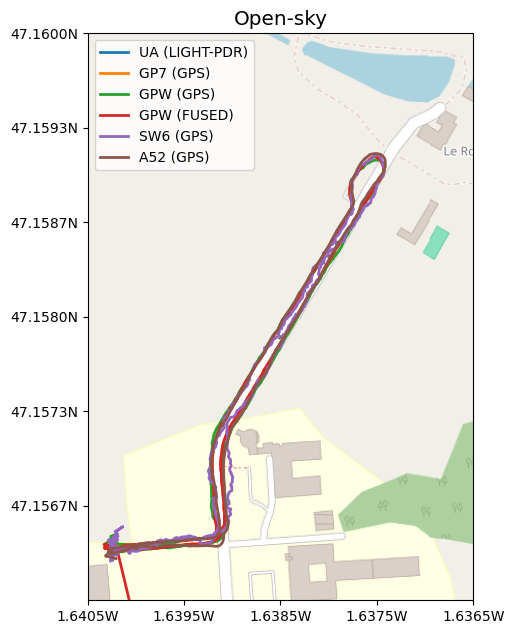

In [127]:
acq_list = ['A8']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
center = [47.158, -1.6385]
extent = [center[1] - 0.002, center[1] + 0.002, center[0] - 0.002, center[0] + 0.002]

locations = {}
locations['UA (LIGHT-PDR)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['LIGHT-PDR']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (GPS)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (FUSED)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['FUSED']), ["latitude", "longitude"]]
locations['SW6 (GPS)'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['A52 (GPS)'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=17, figsize=(5,6.5))
plt.title("Open-sky")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

#plt.grid()

## Positioning quality

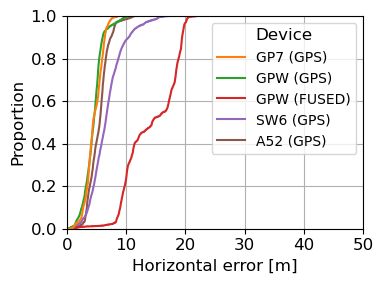

In [114]:
acq_list = ['A8', 'A10']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))

provider_uliss = 'HYB'
#provider_android = 'GPS'

provider_android = {'A52':['GPS'], 'GP7':['GPS'], 'GPW':['GPS','FUSED'], 'SW6':['GPS']}

log_diff = misc.getENUErrors(log_dict, device_uliss[0], acq_list, provider_uliss, provider_android)

misc.plotECDF(log_diff)
plt.savefig(f'./Figures/pos_ecdf_{survey}_texting.png', dpi=300)

# Urban canyoning

In [128]:
survey = 'S4'
folder_path = folder_path = f"{dataset_path}{survey}"

device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA']
device_awinda = ['AWINDA']

## Plot trajectory

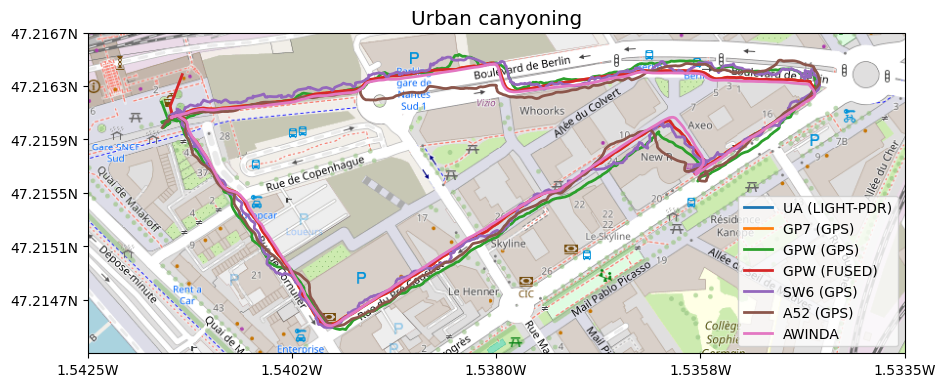

In [130]:
acq_list = ['A1']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_awinda(folder_path, acq_list, device_awinda, survey=survey))
center = [47.2155, -1.538]
extent = [center[1] - 0.0045, center[1] + 0.0045, center[0] - 0.0012, center[0] + 0.0012]
#extent = [center[1] - 0.008, center[1] + 0.008, center[0] - 0.005, center[0] + 0.005]

locations = {}
locations['UA (LIGHT-PDR)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['LIGHT-PDR']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (GPS)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (FUSED)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['FUSED']), ["latitude", "longitude"]]
locations['SW6 (GPS)'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['A52 (GPS)'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['AWINDA'] = log_dict['AWINDA'].loc[log_dict['AWINDA']['provider'].isin(['AWINDA']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=17, figsize=(10,4))
plt.title("Urban canyoning")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

#plt.grid()

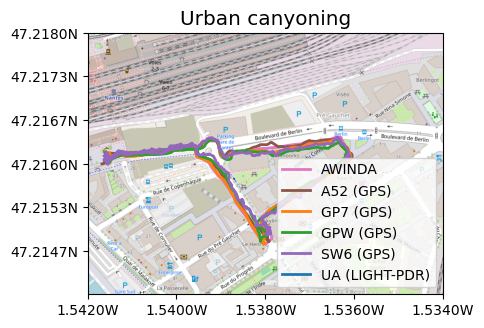

In [132]:
acq_list = ['A2']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_awinda(folder_path, acq_list, device_awinda, survey=survey))
center = [47.216, -1.538]
extent = [center[1] - 0.004, center[1] + 0.004, center[0] - 0.002, center[0] + 0.002]

locations = {}
locations['AWINDA'] = log_dict['AWINDA'].loc[log_dict['AWINDA']['provider'].isin(['AWINDA']), ["latitude", "longitude"]]
locations['A52 (GPS)'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (GPS)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['SW6 (GPS)'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['UA (LIGHT-PDR)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['LIGHT-PDR']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=17, figsize=(5,6.5))
plt.title("Urban canyoning")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

#plt.grid()

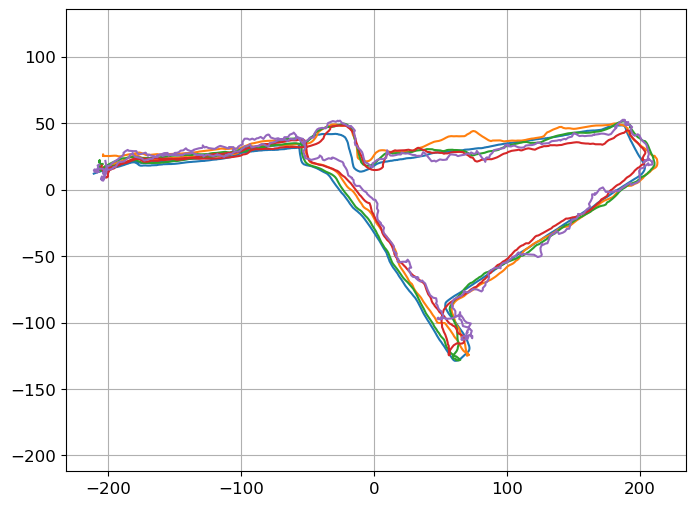

In [21]:
provider_uliss = 'HYB'
provider_android = 'GPS'
misc.plotEN(log_dict, device_android, device_uliss[0], acq_list[0], provider_uliss, provider_android)

## Positioning quality

In [134]:
acq_list = ['A1', 'A2']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))
log_dict.update(misc.load_awinda(folder_path, acq_list, device_awinda, survey=survey))
provider_uliss = 'HYB'
#provider_android = 'GPS'

provider_devices = {'A52':['GPS'], 'GP7':['GPS'], 'GPW':['GPS','FUSED'], 'SW6':['GPS'], 'UA':['LIGHT-PDR']}

#log_diff = misc.getENUErrors(log_dict, device_android, device_uliss[0], acq_list, provider_uliss, provider_android)
log_diff = misc.getENUErrors(log_dict, 'AWINDA', acq_list, 'AWINDA', provider_devices)


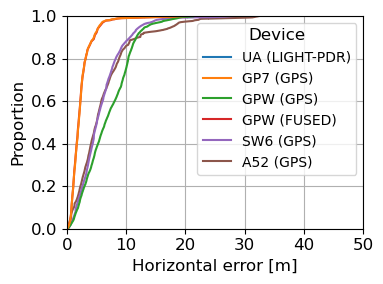

In [135]:
misc.plotECDF(log_diff)
plt.savefig(f'./Figures/pos_ecdf_{survey}_texting.png', dpi=300)

# Light indoor

In [136]:
survey = 'S3'
folder_path = folder_path = f"{dataset_path}{survey}"

device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA']
device_awinda = ['AWINDA']

## Plot trajectory

In [137]:
acq_list = ['A4']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_awinda(folder_path, acq_list, device_awinda, survey=survey))

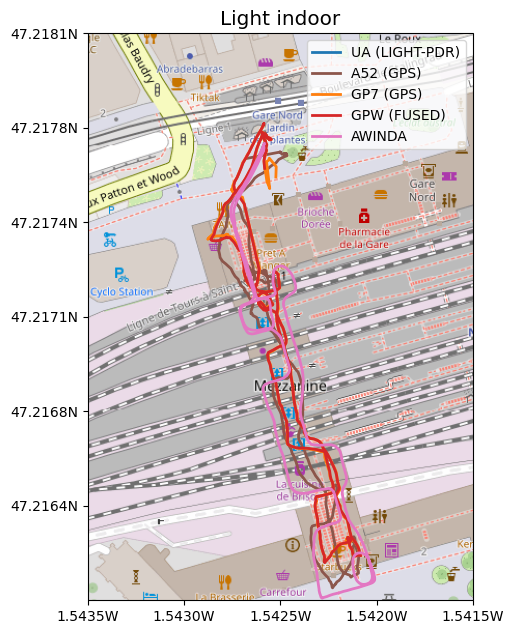

In [138]:
center = [47.2171, -1.5425]
extent = [center[1] - 0.001, center[1] + 0.001, center[0] - 0.001, center[0] + 0.001]

locations = {}
locations['UA (LIGHT-PDR)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['LIGHT-PDR']), ["latitude", "longitude"]]
locations['A52 (GPS)'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
#locations['GPW (GPS)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (FUSED)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['FUSED']), ["latitude", "longitude"]]
#locations['SW6'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['AWINDA'] = log_dict['AWINDA'].loc[log_dict['AWINDA']['provider'].isin(['AWINDA']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=18, figsize=(5,6.5))
plt.title("Light indoor")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

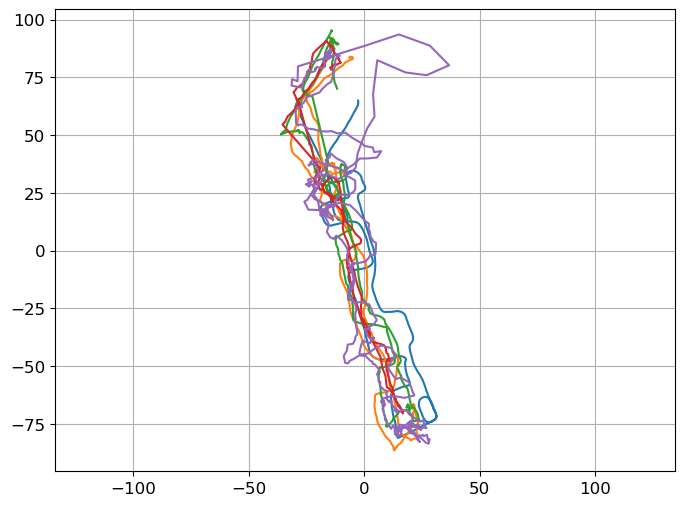

In [27]:
provider_uliss = 'HYB'
provider_android = 'GPS'
misc.plotEN(log_dict, device_android, device_uliss[0], acq_list[0], provider_uliss, provider_android)


## Positioning quality

In [140]:
acq_list = ['A2', 'A4']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))
log_dict.update(misc.load_awinda(folder_path, acq_list, device_awinda, survey=survey))

provider_uliss = 'HYB'
#provider_android = 'GPS'

#provider_android = {'A52':['GPS'], 'GP7':['GPS'], 'GPW':['GPS','FUSED'], 'SW6':['GPS']}

#log_diff = misc.getENUErrors(log_dict, device_android, device_uliss[0], acq_list, provider_uliss, provider_android)
provider_devices = {'A52':['GPS'], 'GP7':['GPS'], 'GPW':['GPS','FUSED'], 'SW6':['GPS'], 'UA':['LIGHT-PDR']}

#log_diff = misc.getENUErrors(log_dict, device_android, device_uliss[0], acq_list, provider_uliss, provider_android)
log_diff = misc.getENUErrors(log_dict, 'AWINDA', acq_list, 'AWINDA', provider_devices)

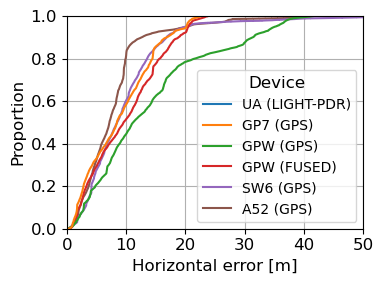

In [141]:

misc.plotECDF(log_diff)
plt.savefig(f'./Figures/pos_ecdf_{survey}_texting.png', dpi=300)